In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
log_path = Path("/home/kafka/repos/thesis/logs_rebelrig")
MACHINE = "RebelRig"
BATCH_SIZE = 128
DATASET = "cifar10"

model_name = f"resnet18_bs_{BATCH_SIZE}"

model_path_prefix = "resnet18_pretrained_pid"

# Single training
train_path = log_path / "single_runs" / DATASET

# Shared data training
train_mul_path = log_path / "queues" / DATASET / model_name

naive_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_pid"
shared_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_1pf_pid"

if DATASET == "compcars":
    # CompCars, BS 128
    pids = [
        8716, 8989, # Naive
        9453, 9728, # MPS
        10286, 10641, # Shared
        11105, 11481, # Shared + MPS
        11882, 12121, # Naive + DALI
        12466, 12691, # Shared + DALI
        15381, 15662, # Naive + DALI + MPS
        16168, 16439, # Shared + DALI + MPS
        17909, 18361, # Shared + memcpy in workers
        19614, 20058, # Shared + loader per worker + memcpy in workers
        20993, 22565, # Shared + loader per worker
        25104, 25351, # Naive, Dummy data
    ]

    trace_pids = [
        8716, 8989, # Naive
        9453, 9728, # MPS
        10244, 10598, # Shared
        11062, 11437, # Shared + MPS
        11882, 12121, # Naive + DALI
        12428, 12652, # Shared + DALI
        15381, 15662, # Naive + DALI + MPS
        16135, 16403, # Shared + DALI + MPS
        17857, 18310, # Shared + memcpy in workers
        19614, 19986, # Shared + loader per worker + memcpy in workers
        20949, 22487, # Shared + loader per worker
        25104, 25351, # Naive, Dummy data
    ]
if DATASET == "imagenet_10pct":
    pids = [
        14250, 14679, # Naive
        15304, 15745, # MPS
        16496, 16916, # Shared
        17598, 18018, # Shared + MPS
        11269, 0, # Naive DALI
            #18539, 0, # Naive DALI
        12199, 0, # Shared DALI
            #18821, 19052, # Shared DALI
    ]

    trace_pids = [
        14250, 14679, # Naive
        15304, 15745, # MPS
        16453, 16873, # Shared
        17555, 17975, # Shared + MPS
        11269, 0, # Naive DALI
            #18539, 0, # Naive DALI
        12167, 0, # Shared DALI
            #18787, 19019, # Shared DALI
    ]
if DATASET == "cifar10":
    pids = [
        13046, 13348, 13699, 14271, # Naive
        14953, 15163, 23214, 16213, # MPS
        16989, 17395, 17812, 18259, # Shared
        18752, 19087, 19525, 20062, # Shared + MPS
        20713, 20869, 21087, 21381, # Naive DALI
        21822, 21974, 22182, 22453, # Shared DALI
    ]

    trace_pids = [
        13046, 13348, 13699, 14271, # Naive
        14953, 15163, 15600, 16213, # MPS
        16940, 17346, 17769, 18216, # Shared
        18705, 19044, 19481, 20018, # Shared + MPS
        20713, 20869, 21087, 21381, # Naive DALI
        21789, 21941, 22149, 22420, # Shared DALI
    ]

In [3]:
# BASELINE
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 4)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(4, 8)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(8, 12)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(12, 16)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(16, 20)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(20, 24)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali]
    
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 2)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(2, 4)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(4, 6)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(6, 8)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(8, 9)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali] + [0]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(10, 11)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali] + [0]
    


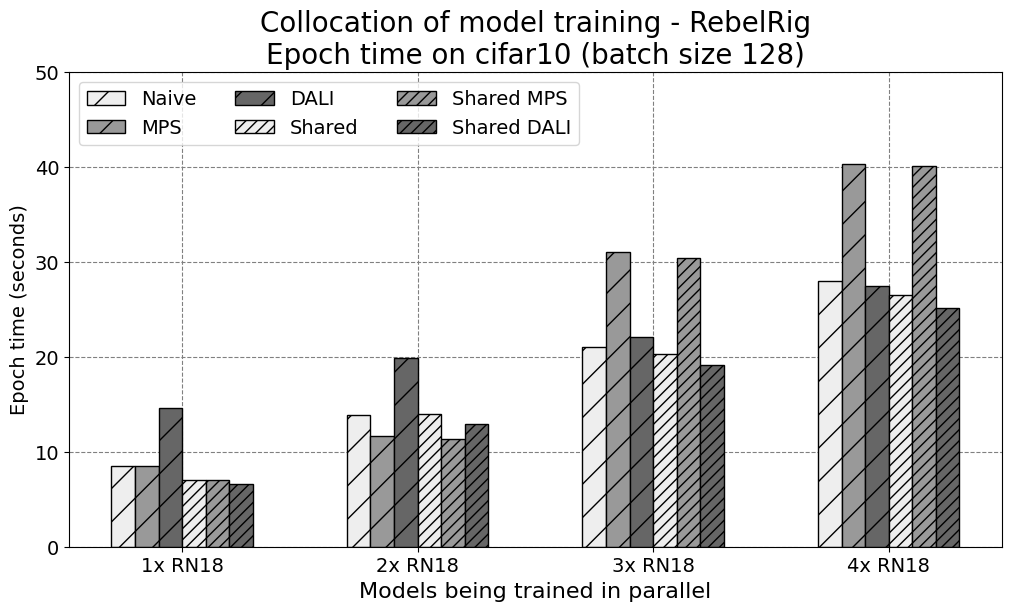

In [4]:
import matplotlib.pyplot as plt
import numpy as np

measurements ={
    "Naive": naive,
    "MPS": mps,
    "DALI": naive_dali,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(10,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on {DATASET} (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14, ncol=3)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 51, 10)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [5]:
def get_mem(dfs):
    mems = []
    for df in dfs:
        df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
        df = df[df[" pid"] != 12626]
        mem = df.groupby([" pid"]).max()["mem"].sum()
        mems.append(mem)
    return mems

In [6]:
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(0, 4)]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(4, 8)]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(8, 12)]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(12, 16)]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(16, 20)]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(20, 24)]
    
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(0, 2)]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(2, 4)]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(4, 6)]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(6, 8)]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(8, 9)]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}_gpu_util.csv") for i in range(10, 11)]

naive_mem = get_mem(naive)
mps_mem = get_mem(mps)
shared_mem = get_mem(shared)
shared_mps_mem = get_mem(shared_mps)
naive_dali_mem = get_mem(naive_dali)
shared_dali_mem = get_mem(shared_dali)

if DATASET == "imagenet_10pct":
    naive_dali_mem.append(0)
    shared_dali_mem.append(0)



In [7]:
naive_mem

[1077, 1696, 2315, 2934]

In [1]:
import matplotlib.pyplot as plt
import numpy as np

measurements ={
    "Naive": naive_mem,
    "MPS": mps_mem,
    "DALI": naive_dali_mem,
    "Shared": shared_mem,
    "Shared MPS": shared_mps_mem,
    "Shared DALI": shared_dali_mem,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(14,8))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GPU Memory consumption (MB)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nMemory consumption during {DATASET} training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14, ncol=3)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 8192, 1000)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

NameError: name 'naive_mem' is not defined